4423680/4422102 [==============================] - 0s 0us/step
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/sample - loss: 0.4959 - accuracy: 0.8253
Epoch 2/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3706 - accuracy: 0.8666
Epoch 3/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3346 - accuracy: 0.8780
Epoch 4/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3113 - accuracy: 0.8861
Epoch 5/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2919 - accuracy: 0.8924
Epoch 6/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2783 - accuracy: 0.8963
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2658 - accuracy: 0.9008
Epoch 8/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.2551 - accuracy: 0.9056
Epoch 9/10
60000/60000 [==============================] - 

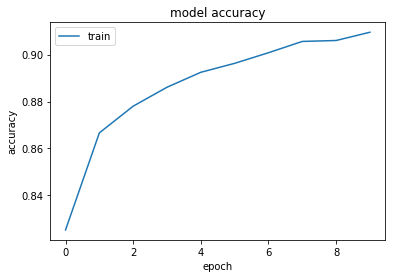

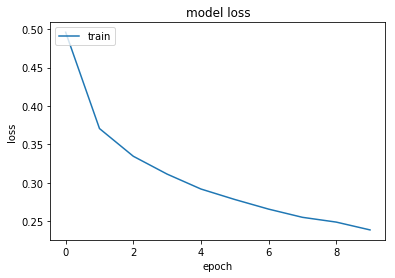

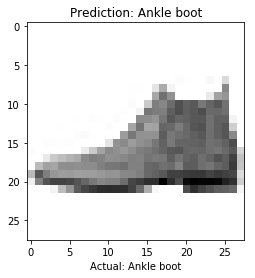

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

#importing/loading the data
data = keras.datasets.fashion_mnist

#segregating the data
(train_images, train_labels), (test_images, test_labels) = data.load_data()

#listing the classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#normalizing the images
train_images = train_images/255.0
test_images = test_images/255.0

#defining the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation='softmax')
    ])

#compiling the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#training the model
history = model.fit(train_images, train_labels, epochs=10)

#testing the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Tested Accuracy:", test_acc)
print("Tested Loss:", test_loss)

#plotting testing accuracy and testing loss
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#predicting the class
prediction = model.predict(test_images)

#printing the class of the predicted value
#print(class_names[np.argmax(prediction[0])])

#plotting a visualization for a sample of the test data to validate the predictions
for i in range(1):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + class_names[test_labels[i]])
    plt.title("Prediction: " + class_names[np.argmax(prediction[i])])
    plt.show()